<!-- JPN -->
# 分類：ロジスティック回帰

<!-- ENG -->
# Classification: Logistic regression

<!-- JPN -->
※本演習資料の二次配布・再配布はお断り致します。

<!-- ENG -->
※Distribution or redistribution of these exercise materials without the copyright holder's permission is not permitted.

<!-- JPN -->
　今回の演習の内容は分類モデルの1つである「**ロジスティック回帰 (Logistic regression)** 」についてである。

- **1 | データセットの作成**
- **2 | scikit-learnを用いたロジスティック回帰**
- **3 | ロジスティック回帰を実装する**

<!-- ENG -->
　The content of this exercise is “**Logistic regression**”, one of the classification models.

- **1 | Creating a data set**
- **2 | Logistic regression using scikit-learn**
- **3 | Implementing logistic regression**

<!-- JPN -->
## 1 | データセットの作成

<!-- ENG -->
## 1 | Creating a data set

<!-- JPN -->
　まずは、データセットの作成を行う。今回は、2つの説明変数 $x_1, x_2$ から、正例 (Positive) と負例 (Negative) を予測するための仮想的なデータを用いる（例えば、ロボットの2つのアームの角度を $x_1, x_2$ [rad] にしたときに、物体を掴むことができたらpositive、できなければnegative、などだろうか）。

　ここでは、**$-x_1 + 2x_2 > 0$ であれば正例であるが、多少ノイズが含まれている仮想的なデータ**を作成している。

<!-- ENG -->
　First, create a data set. This time, we will use virtual data to predict positive and negative examples from the two explanatory variables $x_1, x_2$ (e.g., when the angles of the two arms of the robot are $x_1, x_2$ [rad], it is positive if the robot can grab an object, negative if it cannot, etc.).

　Here, **we have created virtual data that contains some noise, although it is a positive example if** $-x_1 + 2x_2 > 0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating virtual data
np.random.seed(2022)
n = 40
X_train = np.random.randn(n, 2)

noise = 1.6 * np.random.randn(n)                             # Noise is included in the results
y_train_bool = - X_train[:,0] + 2 * X_train[:,1] + noise > 0 # -x1 + 2 x2 > 0 is defined as positive
y_train = np.where(y_train_bool, 1, -1)                      # Convert so that True = 1, False = -1

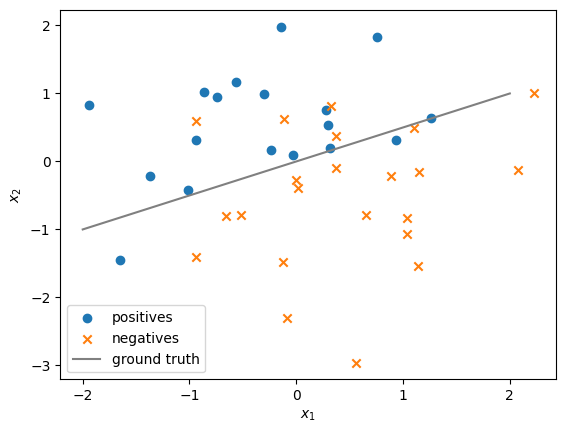

In [3]:
# Show scatter plot of the observed data
plt.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1],
            marker="o", label="positives")           # Show positive (y =  1) with o
plt.scatter(X_train[:,0][y_train==-1],X_train[:,1][y_train==-1],
            marker="x", label="negatives")           # Show negative (y = -1) with x

# Show true boundaries
# x_1 = 2 x_2 since the boundary is y = - x_1 + 2 x_2 = 0
plt.plot([-2, 2], [-1, 1], "gray", label="ground truth") # Draw a straight line from (-2, -1) to (2, 1)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc="lower left")
plt.show()

<!-- JPN -->
ground truthとして、$-x_1 + 2x_2 = 0$ の直線を合わせて描画した。

　正例と負例を直線で分離することは不可能だが、大まかには左上側に正例が、右下側に負例がまとまっているようである。

<!-- ENG -->
As a ground truth, the line $-x_1 + 2x_2 = 0$ was drawn together.

　Although it is not possible to separate the positive and negative examples in a straight line, in general, the positive examples seem to be clustered in the upper left side and the negative examples in the lower right side.

<!-- JPN -->
## 2 | scikit-learnを用いたロジスティック回帰 (Logistic Regression)



<!-- ENG -->
## 2 | Logistic Regression using scikit-learn



<!-- JPN -->
　まずはscikit-learnを用いてロジスティック回帰を実行してみる。ロジスティック回帰は、線形な分類モデルである（**回帰 (Regression) と名前がついているが、分類 (Classification) のモデルであることに注意してほしい**）。

<!-- ENG -->
　We will first try to run logistic regression using scikit-learn. Logistic regression is a linear classification model (**note that although it is named Regression, it is a Classification model**).

<!-- JPN -->
　scikit-learnにはロジスティック回帰は`LogisticRegression()`という名前で用意されているので、学習を行ってみる。計算内容の詳細は**第3章**で説明するので、とりあえず利用してみよう。

<!-- ENG -->
　In scikit-learn, logistic regression is provided as `LogisticRegression()`, so let's try machine learning. The details of calculation contents will be explained in **Section 3**, so let's use it for now.

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=False) # Do not add a constant term (fit_intercept=False)
lr.fit(X_train, y_train)                     # Fit the model
print(lr.coef_)                              # Output the w_1, w_2 value

[[-1.07954347  1.31338581]]


<!-- JPN -->
ロジスティック回帰は正例である確率 $r$ について、 $\ln\frac{r}{1-r} = \boldsymbol{w}^T\boldsymbol{x} \Leftrightarrow r = \frac{1}{1+\exp(-\boldsymbol{w}^T\boldsymbol{x})}$ とするモデルであったので、  **新しいデータ $\boldsymbol{x}_{test}$ について $\boldsymbol{w}^T\boldsymbol{x}_{test}$ を計算すれば、正例である確率 $r_{test}$ を計算することができる。** scikit-learnでは、この $r$ の算出は `lr.predict_proba()` を用いればよい。ここでは、$\boldsymbol{x}_{new} = (2,0)$の正例、負例の確率を求めてみる。



<!-- ENG -->
Regarding a positive example of probability $r$ with logistic regression, since it was a model with $\ln\frac{r}{1-r} = \boldsymbol{w}^T\boldsymbol{x} \Leftrightarrow r = \frac{1}{1+\exp(-\boldsymbol{w}^T\boldsymbol{x})}$, **by calculating $\boldsymbol{w}^T\boldsymbol{x}_{test}$ for the new data $\boldsymbol{x}_{test}$, the positive example of probability $r_{test}$ can be calculated.** In scikit-learn, this $r$ can be calculated by using `lr.predict_proba()`. Let's try to find the probability of positive and negative examples of $\boldsymbol{x}_{new} = (2,0)$.



In [5]:
lr.predict_proba([[2,0]])

array([[0.89651487, 0.10348513]])

<!-- JPN -->
出力は負例の確率 $1-r$、正例の確率 $r$ の順番になっていることに気を付けてほしい。

<!-- ENG -->
Notice that the output is in the order of the probability of the negative example, $1-r$, and the probability of the positive example, $r$.

<!-- JPN -->
　つづいて、$r = 0.5$ 、すなわち正例と負例の確率が等しくなっている境界がどのあたりにあるのか、図示してみよう。 $\boldsymbol{w}^T\boldsymbol{x} = -1.08x_1 + 1.31x_2 = 0$ の時 $r=0.5$ となるので、**ロジスティック回帰の正例と負例の境界は直線である**ことがわかる。この境界線を先ほど示したデータセットの散布図に重ね合わせてみる。

<!-- ENG -->
　Next, let's illustrate the boundary where $r = 0.5$, that is, where the probability of positive and negative examples are equal. Since $r = 0.5$ when $\boldsymbol{w}^T\boldsymbol{x} = -1.08x_1 + 1.31x_2 = 0$, we can see that **the boundary between positive and negative examples of logistic regression is a straight line**. Let's superimpose this boundary on the scatter plot of the data set shown earlier.

In [6]:
w_hat = lr.coef_[0]

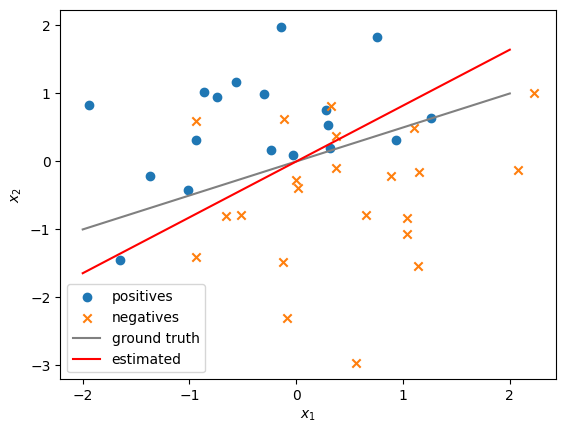

In [7]:
# Show scatter plot of the observed data
plt.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1],
            marker="o", label="positives")           # Show positive (y =  1) with o
plt.scatter(X_train[:,0][y_train==-1],X_train[:,1][y_train==-1],
            marker="x", label="negatives")           # Show negative (y = -1) with x

# Show true boundaries
# x_1 = 2 x_2 since the boundary is y = - x_1 + 2 x_2 = 0
plt.plot([-2, 2], [-1, 1], "gray", label="ground truth") # Draw a straight line from (-2, -1) to (2, 1)

# Show predicted boundaries
# Since a boundary line is always a straight line, estimate only two boundary points and draw a line segment connecting them with a straight line.
# ax_1 + bx_2 = 0  <=>  x_2 = -(a x_1) / b
xx1 = np.array([-2,2])
xx2 = -(w_hat[0] * xx1) / w_hat[1]
plt.plot(xx1, xx2, "red", label="estimated")

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc="lower left")
plt.show()

<!-- JPN -->
少し傾きが異なるものの、大まかにデータ生成時の ground truth と同様な境界線が引けていることがわかる。

<!-- ENG -->
Although the slope is slightly different, it can be seen that the boundary line is generally the same as the ground truth at the time of data generation.

------

<!-- JPN -->
##### 課題 1

　以下のコードで作成された新しいデータ $X_{test}$, $\boldsymbol{y}_{test}$ について、以下の問いに答えよ。

1. これまでのモデル `lr` を用いて、$X_{test}$から 予測結果 `y_hat_test` を求めよ。

2. 1.の予測結果と実際のラベル $\boldsymbol{y}_{test}$ を比較することで正解率 `acc_test` を計算せよ。

<!-- ENG -->
##### Exercise 1

　For the new data $X_{test}$, $\boldsymbol{y}_{test}$ created by the following code, answer the following questions.

1. Using model `lr` that has been used, find the prediction result `y_hat_test` from $X_{test}$.

2. Calculate the accuracy `acc_test` by comparing the predicted result of 1. with the actual label  $\boldsymbol{y}_{test}$.

In [8]:
# CODE CELL FOR YOUR ANSWER

## Generate X_test, y_test
np.random.seed(0)
n = 100
noise = 1.6 * np.random.randn(n)
X_test = np.random.randn(n, 2)
y_test_bool = - X_test[:,0] + 2 * X_test[:,1] + noise > 0
y_test = np.where(y_test_bool, 1, -1)  # Convert True/False to 1/-1


y_hat_test = lr.predict(X_test)
acc_test = np.mean(y_hat_test == y_test)
print(y_hat_test)
print(acc_test)

[-1  1  1 -1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1 -1  1
  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1
 -1  1 -1 -1 -1  1 -1  1  1  1  1 -1  1 -1 -1  1 -1  1  1  1  1  1  1  1
 -1  1  1  1]
0.79


-----

<!-- JPN -->
##### 課題 2（実践、提出不要）

　**データに含まれるノイズが増えると予測は難しくなるはずである**。データ生成のコードの`noise`の`1.6`を適宜書き換え、正解率 (Accuracy) がどのように変化するか確認せよ。想定通り、予測問題の難易度は変化しているだろうか（ヒント：テストデータのサンプルサイズ $n$ を100などに増やした方が安定した結果が得られ、評価しやすくなる）。

<!-- ENG -->
##### Exercise 2 (Practical, not required to submit)

　**The more noise in the data, the harder it should be to predict**. Rewrite `noise = 1.6` in the data generation code accordingly and see how the accuracy changes. Does the difficulty of the prediction problem change as expected? (hint: increasing the sample size $n$ of the test data to 100 or so will give more stable results and make it easier to evaluate)


<!-- BOTH -->
-----

<!-- JPN -->
##### 課題 3（実践、提出不要）

ここまでは人工データを基づいてきたが、現実のデータに対してロジスティック回帰を行ってみる。
[ワインの品種に関するデータセット](https://archive.ics.uci.edu/ml/datasets/wine)に対して、ロジスティック回帰モデルを用いてワインの品種を分類するタスクを行おう。

(1) デフォルト状態の `LogisticRegression()` を利用して予測モデルを構築し、テストデータの予測を行え。なお、切片が0であるとは限らないため、`fit_intercept=False` は**指定しない**ようにせよ。

(2) 実は `LogisticRegression()` は初期設定においてL2正則化が含まれている（次章に示す損失関数を参照せよ）。そこで、L2正則化項の重みに対するハイパーパラメータチューニングを実施せよ。
  - リッジ回帰と同様、ロジスティック回帰についても、事前に各説明変数は標準化されるべきである。 `StandardScaler()` を含めたパイプラインを構築せよ。

(3) 今回利用したデータセットは、3種類のワインの品種を分類するものであった。 `LogisticRegression()` のデフォルトでは、どのように3つ以上の分類（多クラス分類）を行うか調べよ。

<!-- ENG -->
##### Exercise 3 (Practical, not required to submit)

We have used artificial data in the above. Let's try to perform logistic regression on real data.
With the [Wine Data Set](https://archive.ics.uci.edu/ml/datasets/wine), we will perform the task of classifying wine cultivars using a logistic regression model.

(1) Build a prediction model using `LogisticRegression()` in the default setting and make predictions on the test data. Note that `fit_intercept=False` should **not** be specified, since the intercept is not necessarily zero.

(2) Actually, `LogisticRegression()` includes L2 regularization term by default (see the loss function in the next section). Therefore, perform hyperparameter tuning for the weights of the L2 regularization terms.
- Each explanatory variable should be standardized in advance for logistic regression as well as for ridge regression. Build a pipeline including `StandardScaler()`.

(3) The dataset used in this exercise was to classify three different wine cultivars. Find out how `LogisticRegression()` performs three or more classifications (multi-class classification) by default.

<!-- JPN -->
なお、このデータセットは、scikit-learnの `load_wine()` を利用することで取得することができる。

<!-- ENG -->
Note that the dataset can be obtained with `load_wine()`, which is a method of scikit-learn.

In [9]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X_wine, y_wine = load_wine(return_X_y=True)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, shuffle=True, random_state=2022)

<!-- BOTH -->
-----

<!-- JPN -->
## 3 | ロジスティック回帰を実装する

<!-- ENG -->
## 3 | Implementing logistic regression

<!-- JPN -->
　第2章で、ひとまずロジスティック回帰が利用できるようになった。ここから先は、どのように実装されているか、内部的な理解を深めていく。

<!-- ENG -->
　In secction 2, logistic regression is now available for the first time. From here on, we will gain a better internal understanding of how it is implemented.

<!-- JPN -->
### 3.1 | 分類問題における損失関数（loss function）


<!-- ENG -->
### 3.1 | Loss function in classification problems




<!-- JPN -->
　まず、回帰問題の損失関数を思い出そう。回帰問題では、各予測結果に対して、実際の値 $y$ と予測した値 $y'$ の誤差（＝損失）を小さくするように学習しようと考えていた。この時に、二乗損失という損失関数を用いることで、 $\boldsymbol{w}$ について**下に凸な関数**で、**1階微分が解析的に可能であり、微分値=0となるような $\boldsymbol{w}$ を解析的に求められた**ため、 $J(\boldsymbol{w})$ が最小になるような $\boldsymbol{\hat w}$ を陽に記述することが可能であった。

<!-- ENG -->
　First of all, let's recall the loss function of the regression problem. In the regression problem, for each prediction result, we were trying to minimize the error (=loss) between the actual value $y$ and the predicted value $y'$ by machine learning. At this time, by using the loss function called the squared loss, **the first-order derivative is analytically possible, with the function being convex downward** for $\boldsymbol{w}$, **and we could analytically find $\boldsymbol{w}$ such that the derivative = 0**. Therefore, it was possible to explicitly describe $\boldsymbol{\hat w}$ such that $J(\boldsymbol{w})$ is minimized.

$$\begin{aligned}
J(\boldsymbol{w})   & = \frac{1}{n} \sum^n_{i=1} l(y_i, y'_i) = \frac{1}{n} (\boldsymbol{y}-X\boldsymbol{w})^2 \\
f(\boldsymbol{x}_i) & = y'_i = \boldsymbol{w}^T \boldsymbol{x}_i \\
\\
\boldsymbol{\hat w} & = (X^TX)^{-1}X^T\boldsymbol{y}
\end{aligned}$$

<!-- JPN -->
ただし $l(y_i,y'_i)$ は $i$ 番目のデータに関する損失（今回の場合は二乗損失）である。

<!-- ENG -->
where $l(y_i,y'_i)$ is a loss of data $i$ (squared loss, in this case).

<!-- JPN -->

　分類問題の「誤差」を考えると、**実際のクラス $y$ と予測したクラス $y'$ が異なる確率が減少するように学習すれば分類問題を学習できる**はずである。

　この定義に基づいて損失関数を設計し、これとL2正則化項（前回のRidge回帰と同じ）との和を $J(\boldsymbol{w})$ で表現すると、以下のようになる（ **$y_i$ と $y'_i$ が同符号であれば分類が正解していて、異符号であれば分類が誤っていると判断**している）。

<!-- ENG -->
　Considering the error in the classification problem, we should **be able to solve the classification problem by minimizing the probability of misclassification between the actual class $y$ and the predicted class $y'$ using machine learning**.

　The loss function is designed based on this definition, and the sum of this and the L2 norm regularization term (same as the previous ridge regression) is expressed by $J(\boldsymbol{w})$ as follows (**If $y_i$ and $y_i'$ have the same sign, the classification is correct, and if they have different signs, the classification is wrong**.)

$$\begin{aligned}
J(\boldsymbol{w}) & = \frac{1}{n} \sum^n_{i=1}[y_i y'_i < 0] + \lambda \boldsymbol{w}^T\boldsymbol{w} \\
y'_i & = \boldsymbol{w}^T \boldsymbol{x}_i \\
[cond ] & = \left\{
    \begin{array}{l}
      1~(cond\text{ is True}) \\
      0~(cond\text{ is False})
    \end{array}
  \right.
\end{aligned}$$


In [10]:
def predict(w, X):
  return np.dot(w.T, X.T)
def loss_func_1(w, X, y, lam):
  n = len(y)
  return 1/n * np.sum(y * predict(w, X) < 0 ) + lam * w.dot(w)

<!-- JPN -->
　しかし、講義で確認した通り、これは **$\boldsymbol{w}$ について下に凸な関数ではない**ため、**微分値=0**を条件としても最適な解を得ることができない。

<!-- ENG -->
　However, as we confirmed in the lecture, this is **not a downward convex function for $w$**, so we cannot obtain an optimal solution conditional for **the derivative value = 0**.

Text(0, 0.5, 'loss')

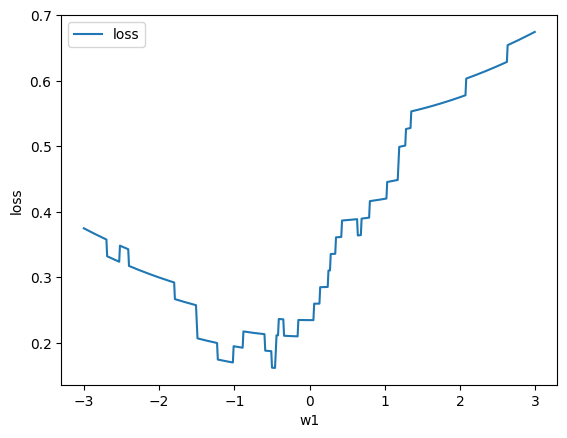

In [11]:
## Keep w2 = 1 as is and try changing w1
lam = 0.01
w2 = 1

loss_values = []
w1_values = np.arange(-3,3,0.01)
for w1 in w1_values:
  w = np.array([w1, w2])
  loss_values.append(loss_func_1(w, X_train, y_train, lam))
plt.plot(w1_values, loss_values, label="loss")
plt.legend()
plt.xlabel("w1")
plt.ylabel("loss")

<!-- JPN -->
　この理想的な損失関数は最適な解を求めることができないので、代わりにロジスティック損失を用いる。ロジスティック損失とL2正則化項の和を以下に示す。

<!-- ENG -->
　Since this ideal loss function cannot be used to find the optimal solution, the logistic loss is used instead. The sum of the logistic loss and the L2 norm regularization term is shown below.

$$\begin{aligned}
J(\boldsymbol{w}) & = \frac{1}{n} \sum^n_{i=1}\log(1+\exp(-y_i y'_i)) + \lambda \boldsymbol{w}^T\boldsymbol{w} \\
y'_i & = \boldsymbol{w}^T \boldsymbol{x}_i
\end{aligned}$$

In [12]:
def loss_func_2(w, X, y, lam):
  n = len(y)
  return 1/n * np.sum(np.log(1 + np.exp(-y * predict(w, X)))) + lam * w.dot(w)

Text(0, 0.5, 'loss')

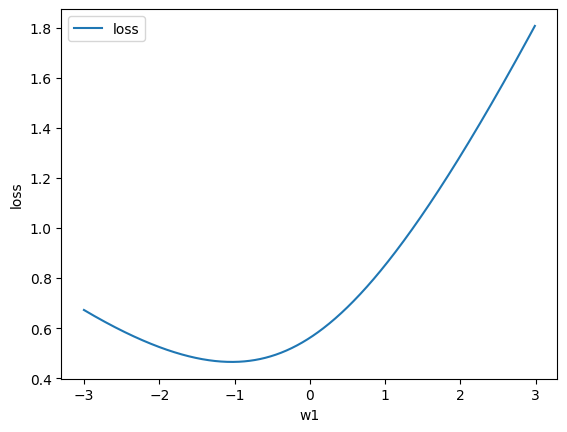

In [13]:
## Keep w2 = 1 as is and try changing w1
lam = 0.01
w2 = 1

loss_values = []
w1_values = np.arange(-3,3,0.01)
for w1 in w1_values:
  w = np.array([w1, w2])
  loss_values.append(loss_func_2(w, X_train, y_train, lam)) #Calculate loss_func_2
plt.plot(w1_values, loss_values, label="loss")
plt.legend()
plt.xlabel("w1")
plt.ylabel("loss")

<!-- JPN -->
　この $J(\boldsymbol{w})$ は、**下に凸な関数**になり、**解析的に $\boldsymbol{w}$ に関する1階偏微分が求められる**。


<!-- ENG -->
　This $J(\boldsymbol{w})$ becomes **a downward convex function**, **and the first-order partial derivative relating to $w$ is analytically obtained**.


$$\begin{aligned}
\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}} = \frac{1}{n}\sum_{i=1}^n\frac{\exp(-y_i \boldsymbol{w}^T \boldsymbol{x}_i)(-y_i \boldsymbol{x}_i)}{1+\exp(-y_i \boldsymbol{w}^T \boldsymbol{x}_i)} + 2\lambda \boldsymbol{w}
\end{aligned}$$

<!-- JPN -->
しかし、**$\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}} = 0$ を $\boldsymbol{w}$ について解析的に解くことができない**ため、3.2節で述べる、さらなる工夫が必要である。

　ここまでの2つの関数を下図にまとめた。最小値の位置が大まかに合致しており（細かくは異なっている）、ロジスティック損失で十分に代用できていることもこの図から読み取れる。

<!-- ENG -->

However, since **$\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}} = 0$ cannot be solved analytically for $\boldsymbol{w}$**, further creative thinking is needed, which will be discussed in Section 3.2.

　The two functions so far are summarized in below figure. It can also be seen from this figure that the locations of the minimum values generally match (but differ in detail), and that the logistic loss is a sufficient substitute.

<!-- BOTH -->
<img src="https://i.imgur.com/yR7GAUF.png" alt="Figure 2" width=70%></img>

<!-- JPN -->

**損失関数とL2正則化項の和のまとめ** | ロジスティック回帰は右側のものが用いられている（Convex downward＝下に凸）。

<!-- ENG -->
**Summary of the loss function and the L2 norm regularization term** | The logistic regression is indicated on the right.

--------------------

<!-- JPN -->
##### 課題 4

　`loss_func_2()`について、$w_2$ についてもグラフを描画することで、下に凸になっていることを確認せよ。また、$w_1=0$ である時、lossの値が最小になる $w_2$ の値 `w_2_hat` を求めよ。答えの精度は小数点以下第1桁まで合っていればよいものとする。。


<!-- ENG -->
##### Exercise 4

　For `loss_func_2()`, confirm that it is convex downward by drawing a graph for $w_2$ as well.  Also, when $w_1 = 0$, find the value of `w_2_hat` that minimizes the loss value. Note that it is sufficient if it is correct to the first decimal place.

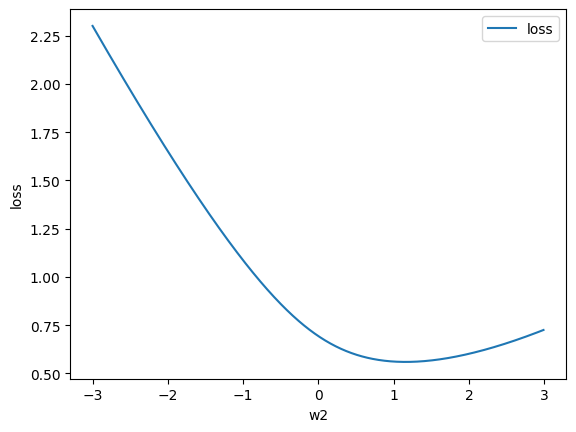

w2_hat when w1=0: 1.1599999999999113


In [16]:
# CODE CELL FOR YOUR ANSWER

lam = 0.01

w2_values = np.arange(-3, 3, 0.01)
loss_values_w2 = []

w1_fixed = 0
for w2 in w2_values:
    w = np.array([w1_fixed, w2])
    loss_values_w2.append(loss_func_2(w, X_train, y_train, lam))

plt.plot(w2_values, loss_values_w2, label="loss")
plt.legend()
plt.xlabel("w2")
plt.ylabel("loss")
plt.show()

min_loss_index_w2 = np.argmin(loss_values_w2)
w2_hat = w2_values[min_loss_index_w2]

print(f"w2_hat when w1=0: {w2_hat}")


-----

<!-- JPN -->

##### 課題 5（発展）

　以下の損失関数の実装を完成させ、これまでと同様の重み$w_1$と損失値とのグラフを描画することで、この関数は$w_1$について下に凸になっているかどうか推定せよ。なお、この損失関数は $y_i \cdot y_i' = 1 $ なる $i$ が存在するとき一般的な微分は不可能であることに注意せよ。

<!-- ENG -->

##### Exercise 5 (Advanced)

　Complete the following implementation of the loss function, and estimate whether this function is convex downward with respect to $w_1$ by drawing a graph of the same weights $w_1$ and the loss values as before. Note that this loss function is not differentiable in general when there is an $i$ such that $y_i \cdot y_i' = 1$.


$$\begin{aligned}
J(\boldsymbol{w}) & = \frac{1}{n} \sum^n_{i=1} l(y_i, y'_i) + \lambda \boldsymbol{w}^T\boldsymbol{w} \\
y'_i & = \boldsymbol{w}^T \boldsymbol{x}_i \\
l(y, y') & = \left\{
    \begin{array}{l}
      -y \cdot y' + 1 \text{ (}y \cdot y' < 1\text{)} \\
      0 \text{ (}y \cdot y' \ge 1\text{)}
    \end{array}
  \right.
\end{aligned}$$

In [19]:
###### Implement l() ######
# Note that y_true and y_pred are both np.array
def l(y_true, y_pred):
    return np.where(y_true * y_pred < 1, -y_true * y_pred + 1, 0)
###########################

def predict(w, X):
  return np.dot(w.T, X.T)
def loss_func_exercise(w, X, y, lam):
  n = len(y)
  return 1/n * np.sum(l(y, predict(w, X))) + lam * w.dot(w)

Text(0, 0.5, 'loss')

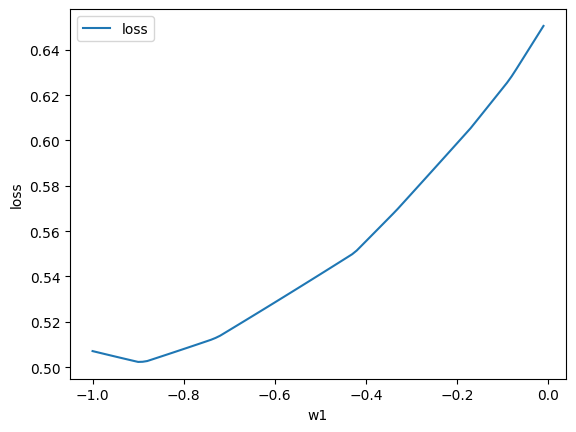

In [20]:
## Keep w2 = 1 as is and try changing w1
lam = 0.01
w2 = 1

loss_values = []
w1_values = np.arange(-1,0,0.01)
for w1 in w1_values:
  w = np.array([w1, w2])
  loss_values.append(loss_func_exercise(w, X_train, y_train, lam))
plt.plot(w1_values, loss_values, label="loss")
plt.legend()
plt.xlabel("w1")
plt.ylabel("loss")

<!-- BOTH -->
------

<!-- JPN -->
### 3.2 | 勾配降下法 (steepest gradient descent) による重み $\boldsymbol{w}$ の最適化

　ロジスティック損失によって、下に凸な関数を定義することはできたが、この関数の値が最小になるような $\boldsymbol{w}$ の値を解析的に求めることはできなかった。
しかし、コンピュータを用いた計算の場合、求めたい値が解析的には求められない場合でも、**繰り返しの計算を行うことで、数値的に答えに近づくことが可能**である。
この節では、最も単純な**勾配降下法 (steepest gradient descent)** を用いた $\boldsymbol{w}$ の最適化を行う。

<!-- ENG -->
### 3.2 | Optimizing weight $\boldsymbol{w}$ using the steepest gradient descent method

　The logistic loss allowed us to define a function that was convex downward, but it did not allow us to analytically find the $\boldsymbol{w}$ value that would minimize the value of this function.
However, in the case of computer-based calculations, even if the value you want to find cannot be found analytically, it is **possible to get closer to the answer numerically by performing repeated calculations**.
In this section, we will optimize $\boldsymbol{w}$ using the simplest **steepest gradient descent method**.

<!-- JPN -->
#### 勾配降下法のイメージ

　まず、勾配降下法のイメージを掴むために、$y=x^2$ について、 $y$ が最小になる $x$ を求めることを考えよう。
もし、関数が下に凸であれば、**関数の坂に玉を転がせば、いつかは $y$ の最小値にたどりつける**はずである。これは、**坂を下る方向に最適な $x$ が存在する**という仮定を置いていることになる。

　勾配降下法では、$\Delta t$ 時間後の玉の座標を、元いた座標における $y$ の勾配 $\left.\frac{dy}{dx}\right|_{x=x_0}$から推定する。

<!-- ENG -->
#### Steepest gradient descent method example

　First, to get an idea of the steepest gradient descent method, let's consider finding $x$ where $y$ is minimized for $y=x^2$.
If the function is convex downward, then **if we roll the ball down the slope of the function, we should eventually reach the minimum value of $y$**. This means that we are making the assumption that **there is an optimal $x$ going in a downward direction on the slope**.

　With the steepest gradient descent method, the coordinates of the ball after $\Delta t$ time are estimated from the gradient of $y$ at the original coordinates $\left.\frac{dy}{dx}\right|_{x=x_0}$.

<!-- BOTH -->
![Figure 3](https://i.imgur.com/tVHnJNE.png)

<!-- JPN -->
#### 数値計算による最適化の枠組み

　数値的に最適な $\boldsymbol{w}$ を計算するためには、（仮想的な）時刻$t$を定め、以下のような更新式を繰り返し実行する。


<!-- ENG -->
#### Optimal framework using numerical computations

　To calculate the numerically optimal $\boldsymbol{w}$, we define a (hypothetical) time $t$ and iteratively run the following update equation.

$$\begin{aligned}
\boldsymbol{w}^{(t+1)} & = \boldsymbol{w}^{(t)} + \alpha^{(t)}\boldsymbol{d}^{(t)}
\end{aligned}$$


<!-- JPN -->
この式において、$\boldsymbol{d}^{(t)}$は最適な $\boldsymbol{w}$ が存在すると考えられる方向（探索方向、search direction）であり、$\alpha^{(t)}$は時刻$t$におけるステップ幅（step length、$\Delta t$ に相当）を定めている。なお、勾配降下法においては $\alpha$ は $t$ によらず一定とすることも多いので、ここではそれに従う。

<!-- ENG -->
In this equation, $\boldsymbol{d}^{(t)}$ is the search direction, which is the direction in which the optimal $\boldsymbol{w}$ is considered to exist, and $\alpha^{(t)}$ is the step length at time $t$, which corresponds to $\Delta t$. With the steepest gradient descent method, $\alpha$ is often assumed to be constant regardless of $t$, and shall be applied here accordingly.

In [21]:
def optimize(X, y, lam, alpha, niter=1000):
  w = np.zeros((2,1)) # w shall be (0,0) at time t=0
  ww = [w]            # Keep history for later drawing, typically not necessary

  for t in range(niter):
    w = w + alpha * direction(X, y, w, lam) # update (alpha is fixed)
    ww.append(w)

  return np.hstack(ww) # Output the entire history

<!-- JPN -->
この時点ではまだ `direction()` の実装を行っていない。次節で実装を考えていこう。

<!-- ENG -->
At this point, we have not yet implemented `direction()`. Let's consider implementation in the next section.

<!-- JPN -->
#### 勾配降下法における探索方向 $\boldsymbol{d}^{(t)}$

　勾配降下法では、**関数の形を坂のようなものであると考え、ある点の勾配 (gradient) を計算して、坂を下る方向に最適解 $w$ がある**という仮説に基づき、 $\boldsymbol{d}^{(t)}$ を決定する。
勾配とは、点$w^{(t)}$における最適化したい関数 $f(\boldsymbol{w})$（今回の場合は $J(\boldsymbol{w})$）の $\boldsymbol{w}$ による1階偏微分 $\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}}$ に相当する。

　先ほども記述したが、 $J(\boldsymbol{w})$ は1階微分が可能なので、解析的に座標 $\boldsymbol{w}$ における微分値を計算することが可能である（**補足資料 ※1**）。


<!-- ENG -->
#### Search direction in steepest gradient descent method $\boldsymbol{d}^{(t)}$

　The steepest gradient descent method **considers the shape of the function to be like a slope, calculating the gradient at a certain point,** and determining $\boldsymbol{d}^{(t)}$ based on the hypothesis that **the optimal solution $w$ is in the downward direction on the slope**.
The gradient corresponds to the first-order partial derivative $\frac{\partial f(\boldsymbol{w})}{\partial \boldsymbol{w}}$ of the function $f(\boldsymbol{w})$ (In this case, $J(\boldsymbol{w})$) to be optimized by $w$ at the point $\boldsymbol{w}^{(t)}$.

　As described earlier, since $J(\boldsymbol{w})$ is capable of first-order differentiation, it is possible to analytically calculate the derivative at coordinate $\boldsymbol{w}$ (**Supplementary Material S1**).


$$\begin{aligned}
\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}} = \frac{1}{n}\sum_{i=1}^n\frac{\exp(-y_i \boldsymbol{w}^T \boldsymbol{x}_i)(-y_i \boldsymbol{x}_i)}{1+\exp(-y_i \boldsymbol{w}^T \boldsymbol{x}_i)} + 2\lambda \boldsymbol{w}
\end{aligned}$$

<!-- JPN -->
ただし、勾配は坂を上る方向が計算されるが、今回は**最小化**を行う。そのため、勾配の負の方向に進むようにしよう。すなわち、 $\boldsymbol{d}^{(t)} = -\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}}$ となる。

<!-- ENG -->
However, the gradient is calculated in direction of an upward facing slope, but this time it is **minimized**. Therefore, let's try to go in the negative direction of the gradient. In other words, $\boldsymbol{d}^{(t)} = -\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}}$.

In [22]:
def predict(w, X):
  return np.dot(X, w) # Supplementary Material S2

def direction(X, y, w, lam):
  y_vec = y_train.reshape(-1,1)                        # Column vectorization
  block = np.exp(-y_vec * predict(w, X))               # Calculate exp(-yi w^T xi) for each instance of i=1~n
  numerator = block * (-y_vec * X)                     # Calculate the numerator for each instance of i=1~n
  denominator = 1 + block                              # Calculate the denominator for each instance of i=1~n
  total_loss = np.sum(numerator / denominator, axis=0) # Calculate the sum of dw1 and dw2 (once it becomes a one-dimensional array)
  total_loss = total_loss.reshape(-1, 1)               # Re-vectorization of column
  delta_w = total_loss / len(y) + 2 * lam * w          # Calculate dJ(w)/dw
  return - delta_w # Negative direction

<!-- JPN -->
　これで先ほど実装したoptimizeが動くはずだ。実行してみる。

<!-- ENG -->
　The optimizations that were just implemented should work. Lets try executing it.

In [29]:
## gradient discent
lam = 0.0125
alpha = 0.1

ww = optimize(X_train, y_train, lam, alpha)
print(ww) # Row 0: w1 transition, row 1: w2 transition

[[ 0.         -0.01937831 -0.03828255 ... -1.07951324 -1.07951346
  -1.07951369]
 [ 0.          0.02623855  0.05169699 ...  1.31334857  1.31334886
   1.31334914]]


<!-- JPN -->
　`optimize()`関数は、重みの変化を全て記録しているので、変化を描画することが可能である。

<!-- ENG -->
　`The optimize()` function records all changes in the weights, so it is possible to draw the changes.

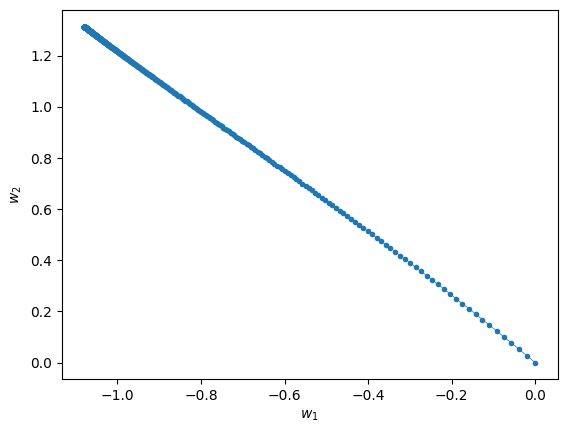

In [30]:
plt.plot(ww[0], ww[1], "o-", linewidth=0.5, markersize=3) # Line graph o- with circle markers
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.show()

<!-- JPN -->
　右下の $\boldsymbol{w}=(0,0)$ を始点として、左上方向に $\boldsymbol{w}$ が更新され、最終的にscikit-learnの結果と同じ $\boldsymbol{\hat w} = (-1.08, 1.31)$ が得られた。また、最終的な解に近づくにつれ更新幅が減少していることもわかる。

<!-- ENG -->
　Starting from $\boldsymbol{w} = (0,0)$ in the lower right, $\boldsymbol{w}$ was updated in the upper left direction, and finally we obtained the same $\boldsymbol{\hat w} = (-1.08, 1.31)$ as the result of scikit-learn. It can also be seen that the update range decreases as the final solution gets closer.

------

<!-- JPN -->
##### 課題 6

　$\alpha$ の値を変更させることで、学習の進み方はどうなるだろうか。$\alpha = 0.001$ 、 $\alpha = 20$ 、およびその間の値を試すことで、**$\alpha$ が大きくなりすぎた時と $\alpha$ が小さくなりすぎた時のそれぞれについてどういうことが起きるか簡潔に述べよ。**

<!-- ENG -->
##### Exercise 6

　By changing the value of $\alpha$, how will your machine learning change? By trying $\alpha = 0.001$, $\alpha = 20$ and values in between, **briefly describe what happens when $\alpha$ becomes too large and  $\alpha$ becomes too small, respectively.**

<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->

When adjusting the learning rate (α) in gradient descent, changing its value affects the optimization process. A higher α(20) can lead to overshooting the minimum, causing divergence or instability in convergence. The updates become excessively large, missing the optimal point and potentially oscillating or diverging.

Conversely, a very small α(0.001) might converge very slowly, requiring numerous iterations to reach the minimum. It navigates cautiously, taking small steps toward the optimal point, which result in a longer time to getting stuck in local minima.



<!-- BOTH -->

---------

<!-- JPN -->
# 補足資料


<!-- ENG -->
# Supplementary Material


<!-- JPN -->
## ※1 | 解析的に微分ができない場合の処理
　解析的に微分ができない時は周囲に$w$の値を僅かにずらして、微分の定義に従って値を推定する。ただし、これを行うためには最低でも変数の数だけ微小にずらした座標の値の計算を行うため、計算的にはかなりコストが大きい。

<!-- ENG -->
## S1 | How to handle when differentiation is not analytically possible
　When differentiation is not possible analytically, the value of $w$ is shifted slightly around in position and the value is estimated according to the definition of differentiation. However, it is computationally quite costly to do this, since it involves calculating the values of coordinates that have been shifted by at least as much as the number of variables.

<!-- JPN -->
## ※2 | `np.dot(X, w)` について

　3.2節において、$\boldsymbol{w}^T\boldsymbol{x}$ の計算を、複数の $\boldsymbol{x}$ について同時に行う際には `np.dot(X, \boldsymbol{w})`で行っている。これは数式として表現すると $X\boldsymbol{w}$で ドット積の順序が逆になり、転置がなくなっているなど直感的ではない。少し考えてみよう。

　まず、ベクトル間の内積はスカラ値なので、 $\boldsymbol{w}^T\boldsymbol{x} = \boldsymbol{x}^T\boldsymbol{w}$ である。さらに、 $X$ とは、以下のような行列であった。

<!-- ENG -->
## S2 | Regarding `np.dot(X, w)`

　In section 3.2, the calculation of $\boldsymbol{w}^T\boldsymbol{x}$ is done with `np.dot(X, \boldsymbol{w})` for multiple $\boldsymbol{x}$'s simultaneously. This is not intuitive when expressed as a formula, as the order of dot products is reversed in $X\boldsymbol{w}$, and transposition is lost. Let's think about this for a moment.

　First, the inner product between vectors is a scalar value so $\boldsymbol{w}^T\boldsymbol{x} = \boldsymbol{x}^T\boldsymbol{w}$. Furthermore, $X$ was the following matrix.

<!-- BOTH -->
$\begin{aligned}
X & = \left[
    \begin{array}{c}
      \boldsymbol{x}_1^T \\
      \boldsymbol{x}_2^T \\
      \vdots \\
      \boldsymbol{x}_N^T
    \end{array}
  \right]
\end{aligned}$


<!-- JPN -->
このことから、以下のような式変形が可能である。


<!-- ENG -->
From this, the following variation of the equation is possible.


<!-- BOTH -->
$\begin{aligned}
Xw & = \left[
    \begin{array}{c}
      \boldsymbol{x}_1^T\boldsymbol{w} \\
      \boldsymbol{x}_2^T\boldsymbol{w} \\
      \vdots \\
      \boldsymbol{x}_N^T\boldsymbol{w}
    \end{array}
  \right] = \left[
    \begin{array}{c}
      \boldsymbol{w}^T\boldsymbol{x}_1 \\
      \boldsymbol{w}^T\boldsymbol{x}_2 \\
      \vdots \\
      \boldsymbol{w}^T\boldsymbol{x}_N
    \end{array}
  \right]
\end{aligned}$


<!-- JPN -->
この結果に基づいて、データセット全件に対する $\boldsymbol{w}^T\boldsymbol{x}$ の計算を一斉に行っている。

<!-- ENG -->
Based on this result, the calculation of $\boldsymbol{w}^T\boldsymbol{x}$ for the entire data set is performed simultaneously.